In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import scipy.stats as corr
import numpy as np

# from https://ourworldindata.org/grapher/population

df = pd.read_csv('population_gdp.csv', thousands=',')
df.dropna(subset= ['population', 'gdp_per_capita'], inplace=True)

df['gdp_per_capita'] = df['gdp_per_capita'].astype(float)

agg = ['Upper-middle-income countries', 
       'Northern America (UN)', 'Europe (UN)', 'South America',      
       'North America',        
       'Europe', 'Laos', 
       'Latin America and the Caribbean (UN)', 'Oceania',  'Oceania (UN)', 'European Union (27)',      
       'Asia', 'Asia (UN)', 'Low-income countries', 
       'Lower-middle-income countries', 'Namibia', 'Myanmar',
       'High-income countries', 'Africa','World',  'Africa (UN)'] 

df = df.loc[~df.Entity.isin(agg)]
df['Year'] = df['Year'].astype(int)
df = df.sort_values(by = 'Year')
df.reset_index(inplace = True, drop = True)

print(df)

                   Entity Code  Year   lookup  population  gdp_per_capita
0                  Mexico  MEX  1990  MEX1990    81720424        15355.63
1                 Lesotho  LSO  1990  LSO1990     1799004         1265.92
2               Nicaragua  NIC  1990  NIC1990     4227824         3409.78
3     Antigua and Barbuda  ATG  1990  ATG1990       63346        15264.63
4                  Belize  BLZ  1990  BLZ1990      182603         6396.50
...                   ...  ...   ...      ...         ...             ...
5797      Solomon Islands  SLB  2021  SLB2021      707855         2406.11
5798              Curacao  CUW  2021  CUW2021      190348        20783.09
5799               Cyprus  CYP  2021  CYP2021     1244193        41701.70
5800          South Korea  KOR  2021  KOR2021    51830136        44232.21
5801             Zimbabwe  ZWE  2021  ZWE2021    15993525         2115.14

[5802 rows x 6 columns]


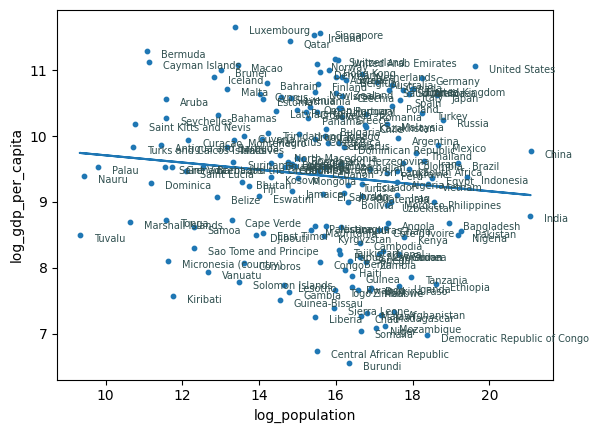

In [64]:
df_2021 = df.loc[df.Year == 2021].copy()
df_2021.reset_index(inplace = True, drop = True)

fig, ax = plt.subplots()

df_2021['log_population'] = np.log(df_2021['population'])
df_2021['log_gdp_per_capita'] = np.log(df_2021['gdp_per_capita'])

df_2021.plot('log_population', 'log_gdp_per_capita', kind='scatter', ax=ax, s=10)

for index, row in df_2021.iterrows():
    ax.annotate(
        row['Entity'],
        (row['log_population'], row['log_gdp_per_capita']),
        xytext=(10, -5),
        textcoords='offset points',
        fontsize=7,
        color='darkslategrey',
        family='sans-serif'
    )

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

plt.show()

In [58]:
storage = pd.DataFrame({'Year': [], 'Correlated': []})

for year in df.Year.unique():
    temp  = df.loc[(df.Year == year) & (~df['population'].isna()) & (~df['gdp_per_capita'].isna()) ]
    storage = storage.append({'Year': year, 'Correlated': corr.pearsonr(temp.population, temp.gdp_per_capita)[0]}, ignore_index=True)

storage['Year'] = storage['Year'].astype(int)
storage = storage.sort_values(by = 'Year')
storage.reset_index(inplace = True, drop = True)

print(storage)

    Year  Correlated
0   1990   -0.062577
1   1991   -0.063213
2   1992   -0.065719
3   1993   -0.066292
4   1994   -0.064462
5   1995   -0.065926
6   1996   -0.066553
7   1997   -0.070301
8   1998   -0.071889
9   1999   -0.072232
10  2000   -0.073303
11  2001   -0.073185
12  2002   -0.073302
13  2003   -0.073854
14  2004   -0.073986
15  2005   -0.074460
16  2006   -0.077563
17  2007   -0.077885
18  2008   -0.077550
19  2009   -0.076207
20  2010   -0.073207
21  2011   -0.071632
22  2012   -0.070758
23  2013   -0.066827
24  2014   -0.066119
25  2015   -0.066088
26  2016   -0.065212
27  2017   -0.064215
28  2018   -0.063255
29  2019   -0.062120
30  2020   -0.056113
31  2021   -0.053426


C:\Users\DioandNono\AppData\Local\Temp\ipykernel_17024\4232163992.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({'Year': year, 'Correlated': corr.pearsonr(temp.population, temp.gdp_per_capita)[0]}, ignore_index=True)
C:\Users\DioandNono\AppData\Local\Temp\ipykernel_17024\4232163992.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({'Year': year, 'Correlated': corr.pearsonr(temp.population, temp.gdp_per_capita)[0]}, ignore_index=True)
C:\Users\DioandNono\AppData\Local\Temp\ipykernel_17024\4232163992.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage = storage.append({'Year': year, 'Correlated': corr.pearsonr(temp.population, temp.gdp_per_capita)[0]}, ignore_i

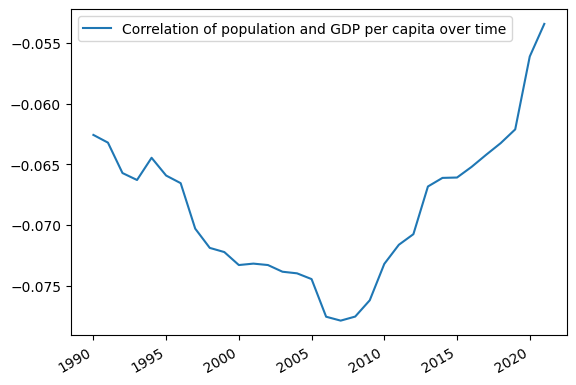

In [59]:
plt.plot(storage['Year'] , storage['Correlated'], label = 'Correlation of population and GDP per capita over time' )
plt.legend(loc='best')
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()
